In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import*
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm
from sklearn.naive_bayes import*

In [88]:
#read the dataset
data = 'avocados.csv'
#df = pd.read_csv(data, index_col = 'geography')
df = pd.read_csv(data)
df.head(15)

,average_price,4046,4225,4770,type,geography
0,1.22,2819.50,28287.42,49.90,conventional,Albany
1,1.79,57.42,153.88,0.00,organic,Albany
2,1.00,364302.39,23821.16,82.15,conventional,Atlanta
3,1.76,1500.15,938.35,0.00,organic,Atlanta
4,1.08,53987.31,552906.04,39995.03,conventional,Baltimore/Washington
5,1.29,8040.64,6557.47,657.48,organic,Baltimore/Washington
6,1.01,44562.12,24964.23,2752.35,conventional,Boise
7,1.64,1.27,1129.50,0.00,organic,Boise
8,1.02,7193.87,396752.18,128.82,conventional,Boston
9,1.83,8.66,939.43,0.00,organic,Boston


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25017 entries, 0 to 25016
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   average_price  25017 non-null  float64
 1   4046           25017 non-null  float64
 2   4225           25017 non-null  float64
 3   4770           25017 non-null  float64
 4   type           25017 non-null  object 
 5   geography      25017 non-null  object 
dtypes: float64(4), object(2)
memory usage: 1.1+ MB


In [90]:
# Determine number of rows and columns
df.shape

(25017, 6)

In [91]:
#Determine if there is duplicated data
print('total number of duplicate values : ',sum(df.duplicated()))

total number of duplicate values :  90


In [92]:
#Determine the distribution of the data in the geography column 
local_counts = df.geography.value_counts()
local_counts

Jacksonville            556
Los Angeles             556
Phoenix/Tucson          556
Grand Rapids            556
Detroit                 556
Denver                  556
Seattle                 556
Raleigh/Greensboro      556
Sacramento              556
South Carolina          556
Philadelphia            556
Indianapolis            556
Pittsburgh              556
Tampa                   556
Dallas/Ft. Worth        556
Houston                 556
Boston                  556
Louisville              556
Nashville               556
Roanoke                 556
Cincinnati/Dayton       556
New Orleans/Mobile      556
Orlando                 556
Albany                  556
Richmond/Norfolk        556
San Francisco           556
Las Vegas               556
Chicago                 556
Atlanta                 556
Miami/Ft. Lauderdale    556
San Diego               556
Syracuse                556
Boise                   556
Charlotte               556
Hartford/Springfield    556
Baltimore/Washington

In [93]:
#Determine the features of the training set by seeing the correlations to each column
df.corr()

,average_price,4046,4225,4770
average_price,1.000000,-0.322963,-0.218882,-0.212859
4046,-0.322963,1.000000,0.711098,0.684695
4225,-0.218882,0.711098,1.000000,0.660069
4770,-0.212859,0.684695,0.660069,1.000000


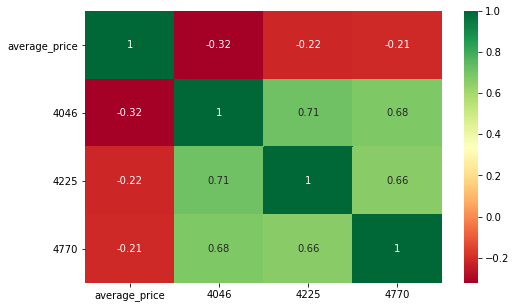

In [94]:
#Plot the relationships in a heat map to visualize the degree of relatedness each column has to average_price.
plt.subplots(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [95]:
#From the heatmap above I can tell the date column is not needed
del df['date']

KeyError: 'date'

In [96]:
#From the heatmap above I can tell the 'type', 'geography' and 'date' columns are not included so they need to be converted
#or deleted.
df.type.map(dict(conventional=1, organic=0))
df = df.replace(to_replace="conventional", value="1")
df = df.replace(to_replace="organic", value="0")
df.head()

,average_price,4046,4225,4770,type,geography
0,1.22,2819.50,28287.42,49.90,1,Albany
1,1.79,57.42,153.88,0.00,0,Albany
2,1.00,364302.39,23821.16,82.15,1,Atlanta
3,1.76,1500.15,938.35,0.00,0,Atlanta
4,1.08,53987.31,552906.04,39995.03,1,Baltimore/Washington


In [97]:
#Check again... the features of the training set by seeing the correlations to each column
df.corr()

,average_price,4046,4225,4770
average_price,1.000000,-0.322963,-0.218882,-0.212859
4046,-0.322963,1.000000,0.711098,0.684695
4225,-0.218882,0.711098,1.000000,0.660069
4770,-0.212859,0.684695,0.660069,1.000000


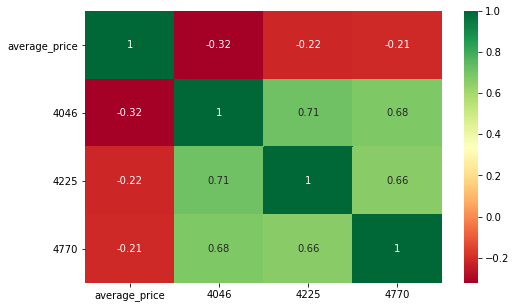

In [98]:
#Check again... Plot the relationships in a heat map to visualize the degree of relatedness each column has to average_price.
plt.subplots(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [99]:
# Drop the geography columns that will create more noise in the training model.
df.drop(df.loc[df['geography']== 'California'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Great Lakes'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Northeast'].index, inplace=True)
df.drop(df.loc[df['geography']== 'South Central'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Plains'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Northern New England'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Total U.S.'].index, inplace=True)
df.drop(df.loc[df['geography']== 'West'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Great Lakes'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Southeast'].index, inplace=True)
#df.drop(df.loc[df['geography']== 'Houston'].index, inplace=True)
#df.drop(df.loc[df['geography']== 'Tampa'].index, inplace=True)
#df.drop(df.loc[df['geography']== 'Las Vegas'].index, inplace=True)
#df.drop(df.loc[df['geography']== 'Detroit'].index, inplace=True)
df.head(20)

,average_price,4046,4225,4770,type,geography
0,1.22,2819.50,28287.42,49.90,1,Albany
1,1.79,57.42,153.88,0.00,0,Albany
2,1.00,364302.39,23821.16,82.15,1,Atlanta
3,1.76,1500.15,938.35,0.00,0,Atlanta
4,1.08,53987.31,552906.04,39995.03,1,Baltimore/Washington
5,1.29,8040.64,6557.47,657.48,0,Baltimore/Washington
6,1.01,44562.12,24964.23,2752.35,1,Boise
7,1.64,1.27,1129.50,0.00,0,Boise
8,1.02,7193.87,396752.18,128.82,1,Boston
9,1.83,8.66,939.43,0.00,0,Boston


In [100]:
# Change the 'date' column dtype to a float for the ml model
#df['date'].astype()

In [101]:
#train the data by putting the average_price in the y axis and all other columns in the x axis
#X=df.drop('average_price',1)
#y=df['average_price']
X=df.drop('geography',1)
y=df['geography']

In [102]:
# print the shape of an 80/20 train test split over the dataset
print('shape of X and y :',X.shape,y.shape)

shape of X and y : (24461, 5) (24461,)


In [103]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [123]:
y.head()

0                  Albany
1                  Albany
2                 Atlanta
3                 Atlanta
4    Baltimore/Washington
Name: geography, dtype: object

In [104]:
print('shape of X and y (train) :',X_train.shape,y_train.shape)
print('shape of X and y (test) :',X_test.shape,y_test.shape)

shape of X and y (train) : (19568, 5) (19568,)
shape of X and y (test) : (4893, 5) (4893,)


In [105]:
#Encode the catagorical columns for use in the ml model
le = LabelEncoder()
df['geography'] = le.fit_transform(df['geography'])

In [106]:
label = LabelEncoder()
df['type'] = label.fit_transform(df['type'])
df

,average_price,4046,4225,4770,type,geography
0,1.22,2819.50,28287.42,49.90,1,0
1,1.79,57.42,153.88,0.00,0,0
2,1.00,364302.39,23821.16,82.15,1,1
3,1.76,1500.15,938.35,0.00,0,1
4,1.08,53987.31,552906.04,39995.03,1,2
...,...,...,...,...,...,...
25012,1.63,249.00,143.00,0.00,0,41
25013,1.12,238039.66,16379.48,151.06,1,42
25014,1.19,200.00,0.00,0.00,0,42
25015,0.89,430203.10,126497.28,21104.42,1,43


In [107]:
# Determine which columns ar not contributing a pattern or key for the best accuracy
scaler=VarianceThreshold(0.1)

In [108]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [109]:
print('shape of X (train) :',X_train.shape)
print('shape of X (test) :',X_test.shape)

shape of X (train) : (19568, 5)
shape of X (test) : (4893, 5)


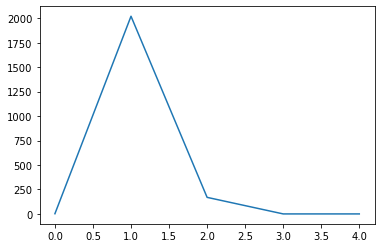

In [110]:
#Scale and Normalize the data
plt.plot(X_train[0])

In [111]:
scaler=StandardScaler()

In [112]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [113]:
# Change the dataframe into a numpy ndarray
print("Type of X_train :",type(X_train))
print("Type of X_test :",type(X_test))

Type of X_train : <class 'numpy.ndarray'>
Type of X_test : <class 'numpy.ndarray'>


In [114]:
#Convert the ndarray into a pandas dataframe
X_train=pd.DataFrame(X_train)
X_train.head()
X_test=pd.DataFrame(X_test)
X_test.head()

,0,1,2,3,4
0,0.717465,-0.434057,-0.500270,-0.334638,-0.999898
1,0.106355,0.749150,-0.228193,-0.332940,1.000102
2,1.328574,-0.437685,-0.489667,-0.333159,-0.999898
3,-0.479291,-0.438763,-0.474994,-0.334638,-0.999898
4,-0.784846,-0.306837,-0.466123,-0.252967,1.000102


In [115]:
print('Type of X_train and X_test :',type(X_train),type(X_test))

Type of X_train and X_test : <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [116]:
actr=[]
acts=[]
lstr=[]
lsts=[]

In [117]:
#Create a RandomForest pipeline
rf = RandomForestRegressor(random_state=0)

In [120]:
rf.fit(X_train,y_train)
y_tr1=rf.predict(X_train)
y_pr=rf.predict(X_test)

print('train data accuracy :',rf.score(X_train,y_train))
print('test data accuracy :',rf.score(X_test,y_test))
print('loss of train data :',mean_squared_error(y_train,y_tr1))
print('loss of test data :',mean_squared_error(y_test,y_pr))

AttributeError: 'DataFrame' object has no attribute 'fit'

In [119]:
actr.append(rf.score(X_train,y_train))
acts.append(rf.score(X_test,y_test))
lstr.append(mean_squared_error(y_train,y_tr1))
lsts.append(mean_squared_error(y_test,y_pr))

AttributeError: 'RandomForestRegressor' object has no attribute 'estimators_'

In [86]:
#Evaluation
model = ['Random Forest']

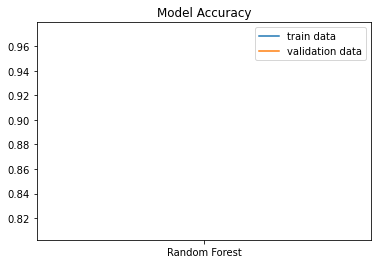

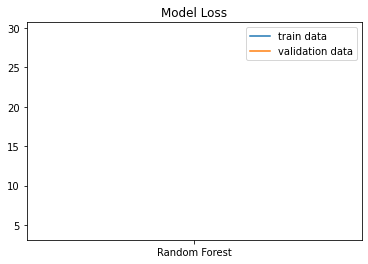

In [152]:
plt.title('Model Accuracy')
plt.plot(model,actr,label='train data')
plt.plot(model,acts,label='validation data')
plt.legend()
plt.show()

plt.title('Model Loss')
plt.plot(model,lstr,label='train data')
plt.plot(model,lsts,label='validation data')
plt.legend()
plt.show()